In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import keras
from keras.models import Sequential  
from keras.layers.core import Dense
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve,confusion_matrix,precision_score,recall_score,classification_report

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['Admission_Predict_Ver1.1.csv', 'Admission_Predict.csv']


Find the Exploratory Analysis and the Regression approach of this dataset [here](https://www.kaggle.com/kenil020/graduate-admission-eda-and-regression/notebook)
.Now we will look at the Classification approach to the dataset.

# **Classification**

Preparing the dataset i.e. Converting the continuous variable Chance of Admit into a discrete variable.

In [2]:
dataset = pd.read_csv('../input/Admission_Predict_Ver1.1.csv')
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Considering the Acceptance Rate of the college is 20%. We would take the Chance of Admit at the 20th percentile as our threshold. Taking 20% because that is what i got when i looked for the college admission rate on google.

In [3]:
dataset.sort_values(by = 'Chance of Admit ',ascending = False).head(int(20/100*len(dataset)))[99:]
# 20% is 100 students according to our data.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
365,366,330,114,4,4.5,3.0,9.17,1,0.86


So lets say we take our threshold as 0.80 for the dataset.

In [4]:
dataset['Admit'] = dataset['Chance of Admit '].apply(lambda x: 1 if x >= 0.80 else 0 )
dataset.head() # Required Dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


Let us now remove the columns that are not required and then rename few columns

In [5]:
dataset.drop(['Serial No.','Chance of Admit '],axis = 1,inplace = True)
dataset.columns = ['GRE','TOEFL','University Rating','SOP','LOR','CGPA','Research','Admit']
dataset.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


Lets dive straight into it with our first classification model.

Before that we would look at the correlation matrix

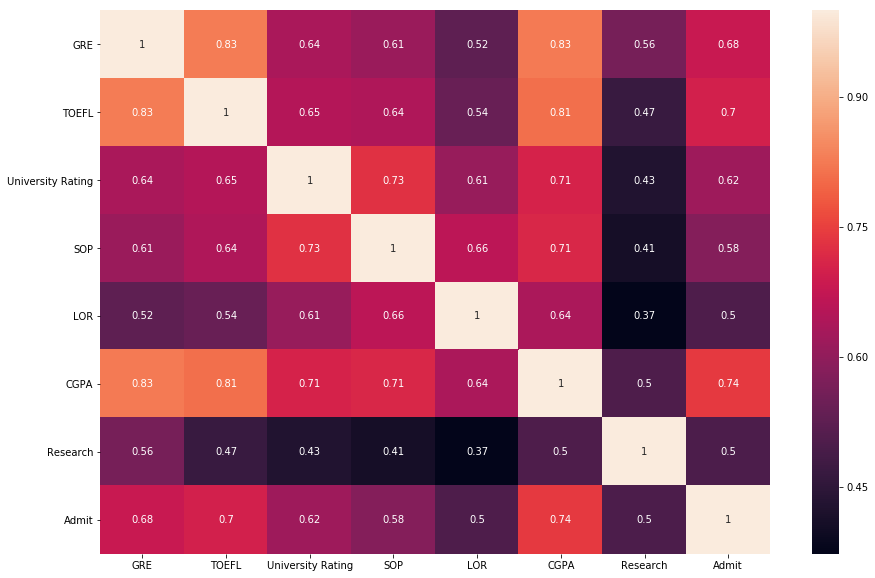

In [6]:
corr_matrix = dataset.corr()
plt.rcParams['figure.figsize'] = 15,10
sns.heatmap(corr_matrix,annot = True)

Let us now split the dataset into train and test for our Classification models.

In [7]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,7].values
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.2,random_state = 27)
test_Y

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

Some metrics we will look at to check the accuracy.
1. Precision = TP /(TP + FP)
2. Recall = TP/(TP + FN)
3. Classification Report. Tells us about the Precision, Recall and F1 score.
3. Confusion Matrix
4. Accuracy of correct prediction = (TP  + TN)/(TP + FP + TN + FN)
5. ROC Curve

## **Logistic Regression**

### ***Training the Model***

In [8]:
model_logistic = LogisticRegression(random_state = 0)
model_logistic.fit(train_X,train_Y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### ***Predicting the Outcome***

In [9]:
pred_logistic = model_logistic.predict(test_X)

### ***Checking for Accuracy***

Precision Score :  0.8275862068965517
Recall Score :  0.8571428571428571
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        72
           1       0.83      0.86      0.84        28

   micro avg       0.91      0.91      0.91       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.91      0.91      0.91       100

Accuracy for Test:  0.91
Accuracy for Train:  0.9025


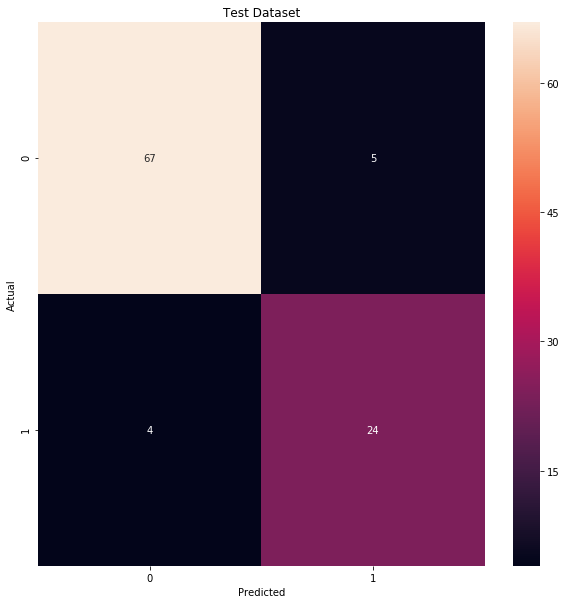

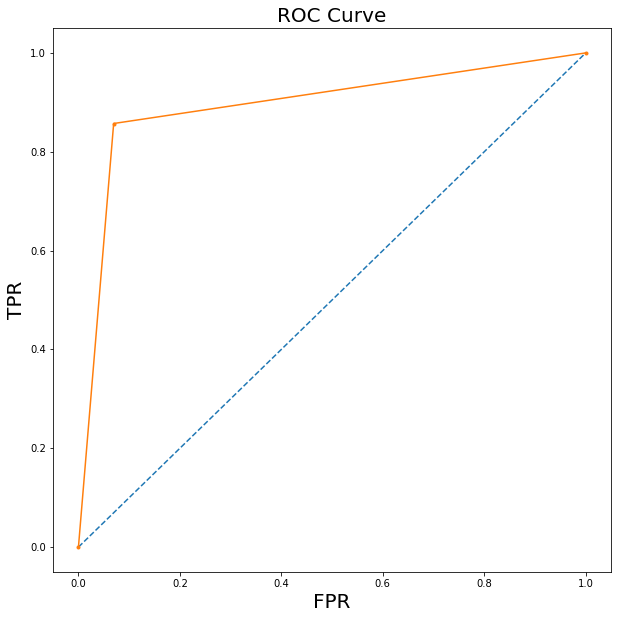

In [10]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_logistic))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_logistic))

#Confusion Matrix
cm_logistic = confusion_matrix(test_Y,pred_logistic)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_logistic))
#Accuracy
print("Accuracy for Test: ",(cm_logistic[0,0] + cm_logistic[1,1])/
      (cm_logistic[0,0] + cm_logistic[1,1] + cm_logistic[0,1] + cm_logistic[1,0]))

plt.rcParams['figure.figsize'] = 10,10
sns.heatmap(cm_logistic,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')

pred_logistic_train = model_logistic.predict(train_X)
cm = confusion_matrix(train_Y,pred_logistic_train)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
plt.rcParams['figure.figsize'] = 7,7
fpr,tpr,threshold = roc_curve(test_Y,pred_logistic)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

So we get an accuracy of around 0.91 i.e. we are able to make correct predictions 91 times out of 100.

## ***Support Vector Classification - Linear Kernel***

### ***Training the model***

In [11]:
model_svc_linear = SVC(kernel = 'linear',random_state = 0 , C = 1)
model_svc_linear.fit(train_X,train_Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

### ***Predicting the Outcome***

In [12]:
pred_svc_linear = model_svc_linear.predict(test_X)

### ***Checking for Accuracy***

Precision Score :  0.8333333333333334
Recall Score :  0.8928571428571429
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        72
           1       0.83      0.89      0.86        28

   micro avg       0.92      0.92      0.92       100
   macro avg       0.90      0.91      0.90       100
weighted avg       0.92      0.92      0.92       100

Accuracy for Test:  0.92
Accuracy for Train:  0.9325


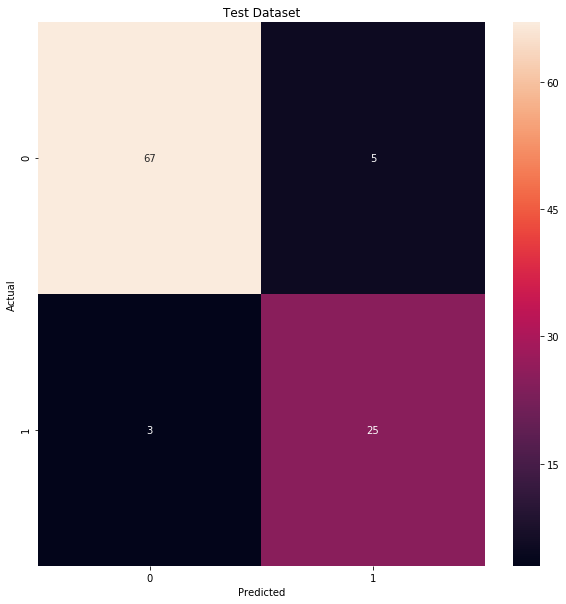

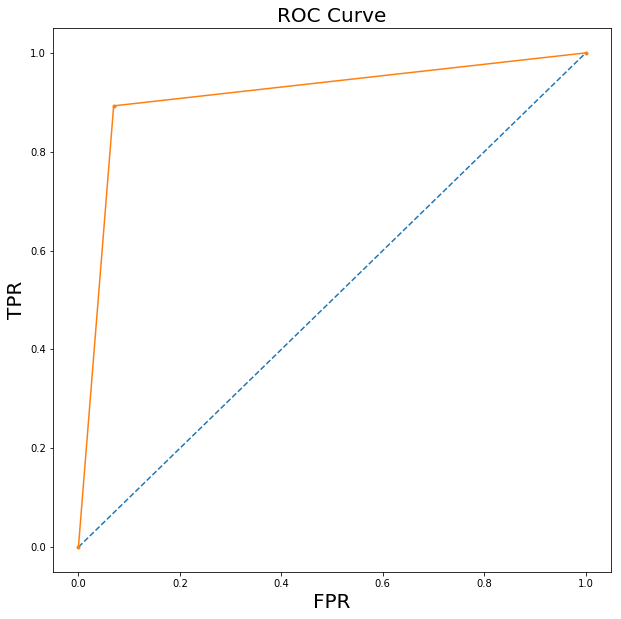

In [13]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_svc_linear))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_svc_linear))

#Confusion Matrix
cm_svc_linear = confusion_matrix(test_Y,pred_svc_linear)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_svc_linear))
#Accuracy
print("Accuracy for Test: ",(cm_svc_linear[0,0] + cm_svc_linear[1,1])/
      (cm_svc_linear[0,0] + cm_svc_linear[1,1] + cm_svc_linear[0,1] + cm_svc_linear[1,0]))

plt.rcParams['figure.figsize'] = 10,10
sns.heatmap(cm_svc_linear,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')


pred_svc_linear_train = model_svc_linear.predict(train_X)
cm = confusion_matrix(train_Y,pred_svc_linear_train)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
plt.rcParams['figure.figsize'] = 7,7
fpr,tpr,threshold = roc_curve(test_Y,pred_svc_linear)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

As we can see we have slightly improved the accuracy as compared to the Logistic Regression Model on both the testing and the training dataset.

## ***Support Vector Classification - Gaussian Kernel***

### ***Training the Dataset***

In [14]:
model_svc_rbf = SVC(kernel = 'rbf',random_state = 0 , C = 100, gamma = 0.01)
model_svc_rbf.fit(train_X,train_Y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

### ***Predicting the Outcome***

In [15]:
pred_svc_rbf = model_svc_rbf.predict(test_X)

### ***Checking the Accuracy***

Precision Score :  0.84375
Recall Score :  0.9642857142857143
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        72
           1       0.84      0.96      0.90        28

   micro avg       0.94      0.94      0.94       100
   macro avg       0.91      0.95      0.93       100
weighted avg       0.95      0.94      0.94       100

Accuracy for Test:  0.94
Accuracy for Train:  0.95


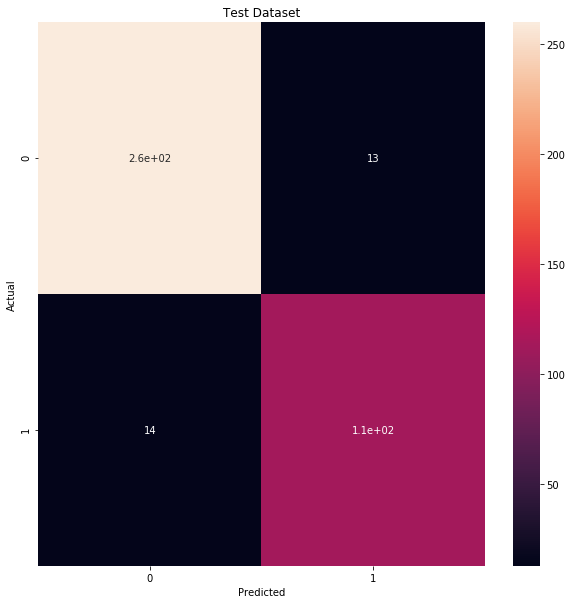

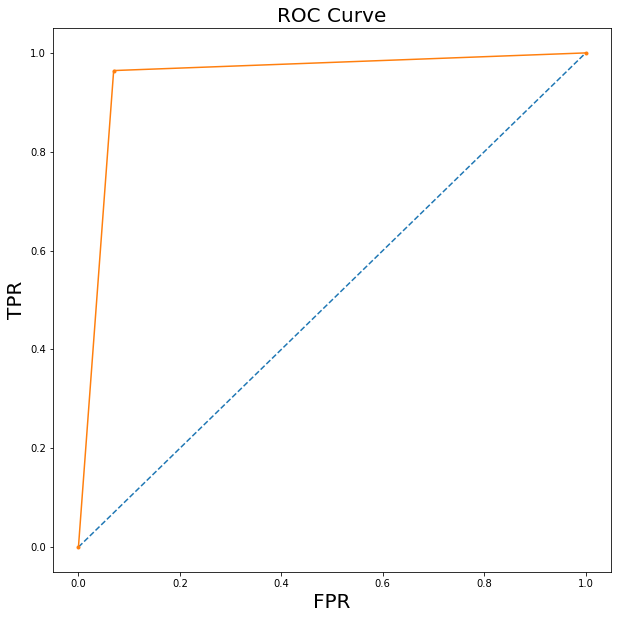

In [16]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_svc_rbf))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_svc_rbf))

#Confusion Matrix
cm_svc_rbf = confusion_matrix(test_Y,pred_svc_rbf)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_svc_rbf))
#Accuracy
print("Accuracy for Test: ",(cm_svc_rbf[0,0] + cm_svc_rbf[1,1])/
      (cm_svc_rbf[0,0] + cm_svc_rbf[1,1] + cm_svc_rbf[0,1] + cm_svc_rbf[1,0]))

plt.rcParams['figure.figsize'] = 10,10
sns.heatmap(cm,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')


pred_svc_rbf_train = model_svc_rbf.predict(train_X)
cm = confusion_matrix(train_Y,pred_svc_rbf_train)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
plt.rcParams['figure.figsize'] = 7,7
fpr,tpr,threshold = roc_curve(test_Y,pred_svc_rbf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

As you can see we have almost narrowed it down on the 100% accuracy for the dataset.

## ***Decision Tree Classification***

### ***Training the Dataset***


In [17]:
model_dtree = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_features = 5,max_depth = 11
                                    ,min_samples_split = 5)
model_dtree.fit(train_X,train_Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=11,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

### ***Predicing the Outcome***

In [18]:
pred_dtree = model_dtree.predict(test_X)

### ***Checking for Accuracy***

Precision Score :  0.8181818181818182
Recall Score :  0.9642857142857143
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.92      0.95        72
           1       0.82      0.96      0.89        28

   micro avg       0.93      0.93      0.93       100
   macro avg       0.90      0.94      0.92       100
weighted avg       0.94      0.93      0.93       100

Accuracy for Test:  0.93
Accuracy for Train:  0.99


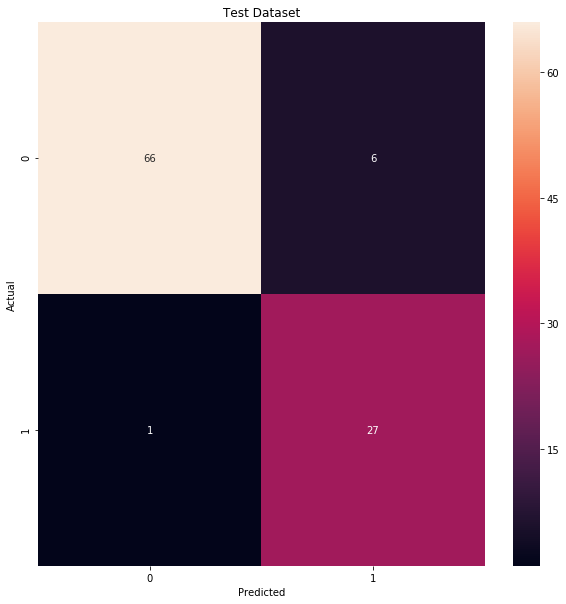

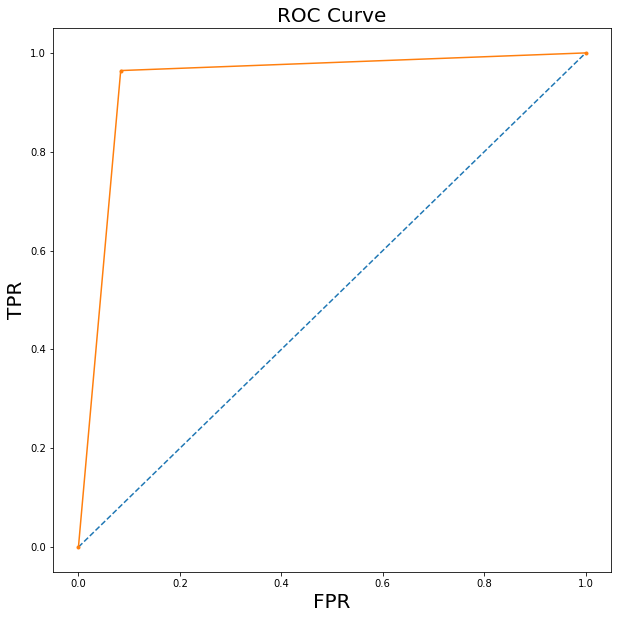

In [19]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_dtree))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_dtree))

#Confusion Matrix
cm_dtree = confusion_matrix(test_Y,pred_dtree)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_dtree))
#Accuracy
print("Accuracy for Test: ",(cm_dtree[0,0] + cm_dtree[1,1])/
      (cm_dtree[0,0] + cm_dtree[1,1] + cm_dtree[0,1] + cm_dtree[1,0]))

plt.rcParams['figure.figsize'] = 10,10
sns.heatmap(cm_dtree,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')

pred_dtree_train = model_dtree.predict(train_X)
cm = confusion_matrix(train_Y,pred_dtree_train)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
plt.rcParams['figure.figsize'] = 7,7
fpr,tpr,threshold = roc_curve(test_Y,pred_dtree)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

We can see that the Accuracy for train and test are nearby, but the difference might suggest that we are overfitting the dataset.

## **Random Forest Classification**

### ***Training the Dataset***

In [20]:
model_rforest = RandomForestClassifier(n_estimators = 500,random_state = 0,max_depth = 5
                                      ,max_features = 5,min_samples_split = 10, 
                                       criterion = 'entropy')
model_rforest.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### ***Predicting the Outcome***

In [21]:
pred_rforest = model_rforest.predict(test_X)

### ***Checking for Accuracy***

Precision Score :  0.7878787878787878
Recall Score :  0.9285714285714286
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        72
           1       0.79      0.93      0.85        28

   micro avg       0.91      0.91      0.91       100
   macro avg       0.88      0.92      0.89       100
weighted avg       0.92      0.91      0.91       100

Accuracy for Test:  0.91
Accuracy for Train:  0.95


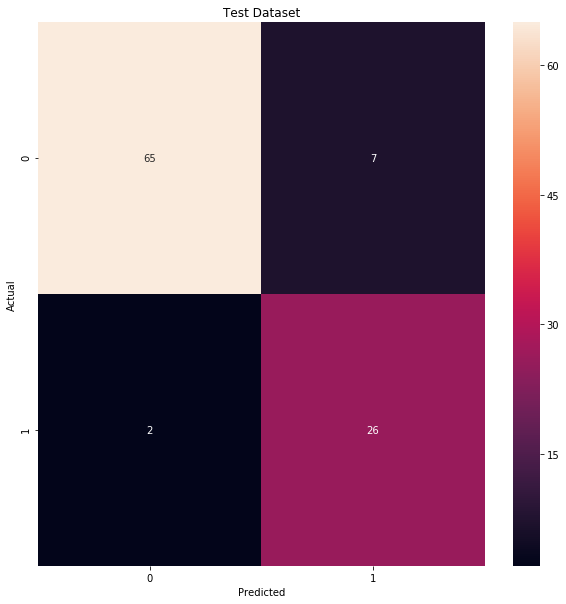

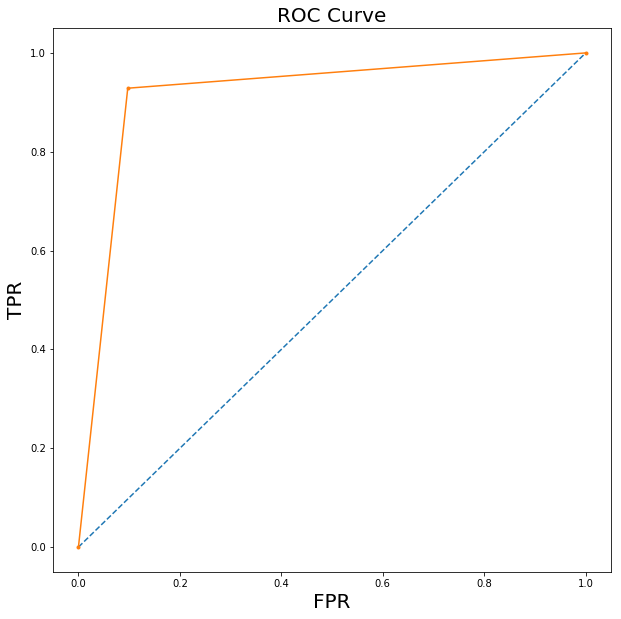

In [22]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_rforest))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_rforest))

#Confusion Matrix
cm_rforest = confusion_matrix(test_Y,pred_rforest)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_rforest))
#Accuracy
print("Accuracy for Test: ",(cm_rforest[0,0] + cm_rforest[1,1])/
      (cm_rforest[0,0] + cm_rforest[1,1] + cm_rforest[0,1] + cm_rforest[1,0]))

plt.rcParams['figure.figsize'] = 10,10
sns.heatmap(cm_rforest,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')

pred_rforest_train = model_rforest.predict(train_X)
cm = confusion_matrix(train_Y,pred_rforest_train)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
plt.rcParams['figure.figsize'] = 7,7
fpr,tpr,threshold = roc_curve(test_Y,pred_rforest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

## **Naive Bayes Classifier**

### ***Training the Dataset***

In [23]:
model_nb = GaussianNB()
model_nb.fit(train_X,train_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

### ***Predicting the Outcomes***

In [24]:
pred_nb = model_nb.predict(test_X)

### ***Checking for Accuracy***

Precision Score :  0.7428571428571429
Recall Score :  0.9285714285714286
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        72
           1       0.74      0.93      0.83        28

   micro avg       0.89      0.89      0.89       100
   macro avg       0.86      0.90      0.87       100
weighted avg       0.91      0.89      0.89       100

Accuracy for Test:  0.89
Accuracy for Train:  0.9125


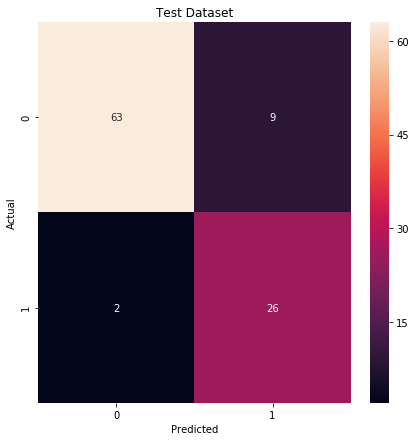

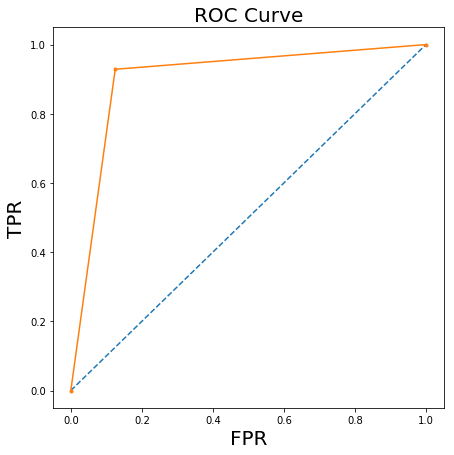

In [25]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_nb))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_nb))

#Confusion Matrix
cm_nb = confusion_matrix(test_Y,pred_nb)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_nb))
#Accuracy
print("Accuracy for Test: ",(cm_nb[0,0] + cm_nb[1,1])/
      (cm_nb[0,0] + cm_nb[1,1] + cm_nb[0,1] + cm_nb[1,0]))

plt.rcParams['figure.figsize'] = 7,7
sns.heatmap(cm_nb,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')

pred_nb_train = model_nb.predict(train_X)
cm = confusion_matrix(train_Y,pred_nb_train)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
plt.rcParams['figure.figsize'] = 10,10
fpr,tpr,threshold = roc_curve(test_Y,pred_nb)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

## **K Nearest Neighbors**

### ***Training the Dataset***

In [26]:
model_knn = KNeighborsClassifier(n_neighbors= 5,metric = 'minkowski',p = 2)
model_knn.fit(train_X,train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### ***Predicting the Outcome***

In [27]:
pred_knn = model_knn.predict(test_X)

### ***Checking for Accuracy***

Precision Score :  0.7428571428571429
Recall Score :  0.9285714285714286
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        72
           1       0.74      0.93      0.83        28

   micro avg       0.89      0.89      0.89       100
   macro avg       0.86      0.90      0.87       100
weighted avg       0.91      0.89      0.89       100

Accuracy for Test:  0.89
Accuracy for Train:  0.9125


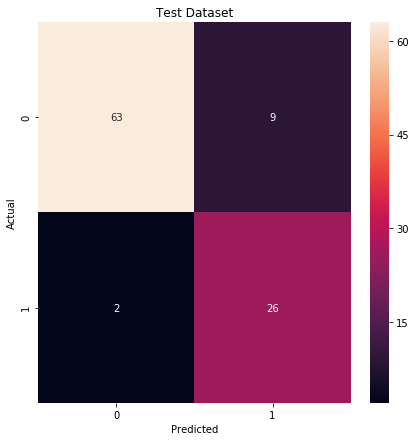

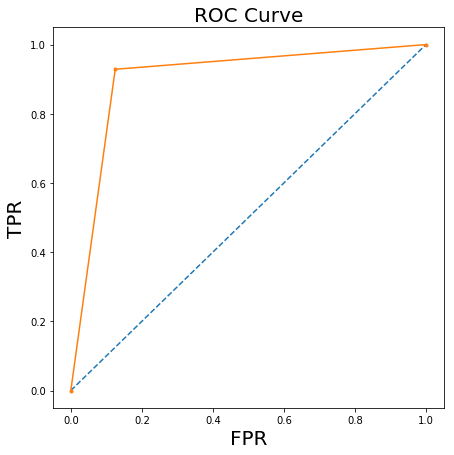

In [28]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_knn))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_knn))

#Confusion Matrix
cm_knn = confusion_matrix(test_Y,pred_knn)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_knn))
#Accuracy
print("Accuracy for Test: ",(cm_knn[0,0] + cm_knn[1,1])/
      (cm_knn[0,0] + cm_knn[1,1] + cm_knn[0,1] + cm_knn[1,0]))

plt.rcParams['figure.figsize'] = 7,7
sns.heatmap(cm_knn,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')

pred_knn_train = model_nb.predict(train_X)
cm = confusion_matrix(train_Y,pred_knn_train)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
plt.rcParams['figure.figsize'] = 10,10
fpr,tpr,threshold = roc_curve(test_Y,pred_knn)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

## **Principal Component Classification**

### ***Finding the Principal Component***

In [29]:
pca = PCA(n_components = None)
train_X_pca = pca.fit_transform(train_X)
test_X_pca = pca.fit(test_X)
explained_variance = pca.explained_variance_ratio_

In [30]:
for x in explained_variance:
    print(round(x,2))

0.93
0.06
0.01
0.0
0.0
0.0
0.0


As we can the variance explained by the first two components is enough and the other components can be ignored. Now using this components to create the new logistic regression model

### ***Training the Dataset***

In [31]:
pca = PCA(n_components = 2)
train_X_pca = pca.fit_transform(train_X)
test_X_pca = pca.transform(test_X)
model_pca = LogisticRegression()
model_pca.fit(train_X_pca,train_Y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### ***Predicting the Outcome***

In [32]:
pred_pca = model_pca.predict(test_X_pca)

### ***Checking the Accuracy***

Precision Score :  0.6944444444444444
Recall Score :  0.8928571428571429
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        72
           1       0.69      0.89      0.78        28

   micro avg       0.86      0.86      0.86       100
   macro avg       0.82      0.87      0.84       100
weighted avg       0.88      0.86      0.86       100

Accuracy for Test:  0.86
Accuracy for Train:  0.89


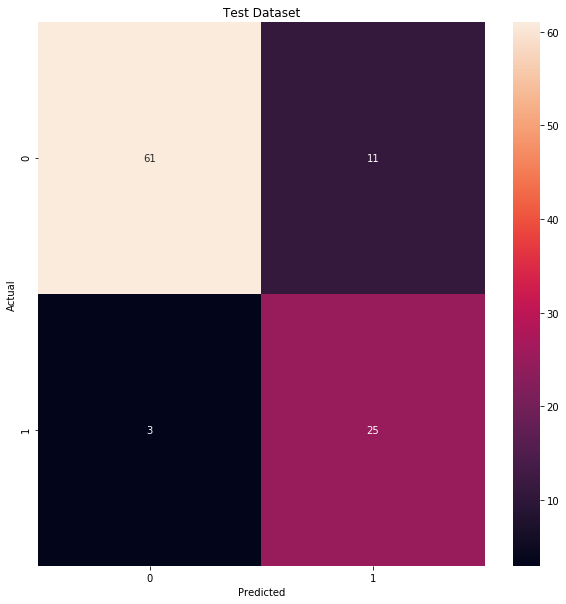

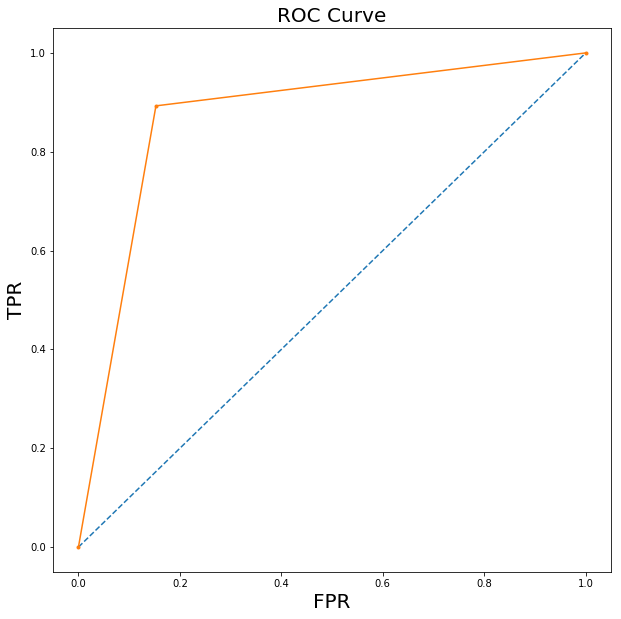

In [33]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_pca))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_pca))

#Confusion Matrix
cm_pca = confusion_matrix(test_Y,pred_pca)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_pca))
#Accuracy
print("Accuracy for Test: ",(cm_pca[0,0] + cm_pca[1,1])/
      (cm_pca[0,0] + cm_pca[1,1] + cm_pca[0,1] + cm_pca[1,0]))

plt.rcParams['figure.figsize'] = 10,10
sns.heatmap(cm_pca,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')

pred_pca_train = model_pca.predict(train_X_pca)
cm = confusion_matrix(train_Y,pred_pca_train)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
plt.rcParams['figure.figsize'] = 7,7
fpr,tpr,threshold = roc_curve(test_Y,pred_pca)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

Though most of the variance is explained by first two parameters, we see that the model does not give great output on the test dataset.

## **Artifical Neural Network**

### ***Training the Dataset***

In [34]:
model_ann = Sequential()
# Input Layer and First Hidden Layer
model_ann.add(Dense(output_dim = 6,init = 'uniform',activation = 'relu',input_dim = 7))

#Second Hidden Layer
model_ann.add(Dense(output_dim = 6,init = 'uniform',activation = 'relu'))

#Final Layer
model_ann.add(Dense(output_dim = 1,init = 'uniform',activation = 'sigmoid'))

#Compiling ANN
model_ann.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

model_ann.fit(train_X,train_Y,batch_size = 5,nb_epoch = 100)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
400/400 [==============================] - 1s 2ms/step - loss: 0.6475 - acc: 0.6825
Epoch 2/100
400/400 [==============================] - 0s 217us/step - loss: 0.6382 - acc: 0.6825
Epoch 3/100
400/400 [==============================] - 0s 221us/step - loss: 0.6369 - acc: 0.6825
Epoch 4/100
400/400 [==============================] - 0s 214us/step - loss: 0.6339 - acc: 0.6825
Epoch 5/100
400/400 [==============================] - 0s 215us/step - loss: 0.6310 - acc: 0.6825
Epoch 6/100
400/400 [==============================] - 0s 222us/step - loss: 0.6308 - acc: 0.6825
Epoch 7/100
400/400 [==============================] - 0s 212us/step - loss: 0.6269 - acc: 0.6825
Epoch 8/100
400/400 [==============================] - 0s 220us/step - loss: 0.6265 - acc: 0.6825
Epoch 9/100
400/400 [==============================] - 0s 215us/step - loss: 0.6243 - acc: 0.6825
Epoch 10/100
400/400 [==============================] - 0s 220us/step - loss: 0.6194 - acc: 0.6825
Epoch 11/100
400/400 

### ***Predicting the Outcome***

In [35]:
pred_ann = model_ann.predict(test_X)
pred_ann = (pred_ann > 0.5)

### ***Checking for Accuracy***

Precision Score :  0.875
Recall Score :  0.75
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        72
           1       0.88      0.75      0.81        28

   micro avg       0.90      0.90      0.90       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.90      0.90      0.90       100

Accuracy for Test:  0.9
Accuracy for Train:  0.875


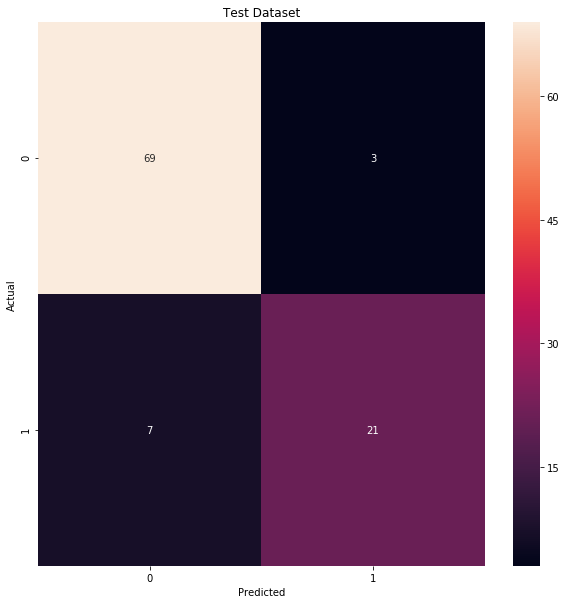

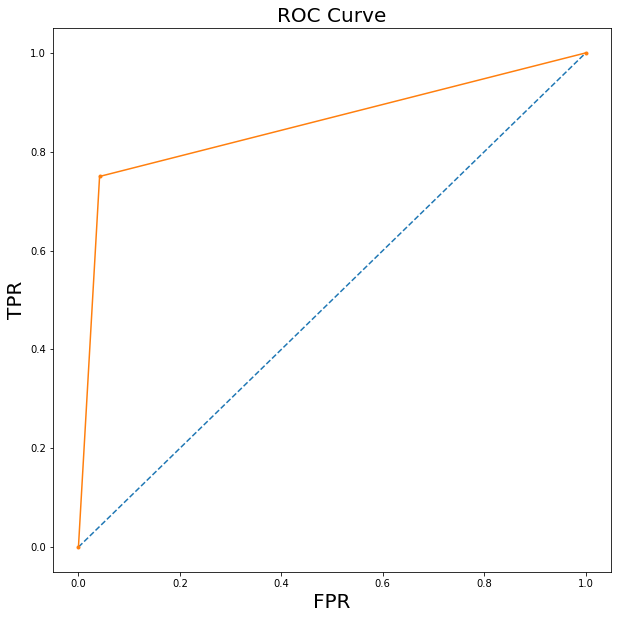

In [36]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_ann))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_ann))

#Confusion Matrix
cm_ann = confusion_matrix(test_Y,pred_ann)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_ann))
#Accuracy
print("Accuracy for Test: ",(cm_ann[0,0] + cm_ann[1,1])/
      (cm_ann[0,0] + cm_ann[1,1] + cm_ann[0,1] + cm_ann[1,0]))

plt.rcParams['figure.figsize'] = 10,10
sns.heatmap(cm_ann,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')

pred_ann_train = model_ann.predict(train_X)
cm = confusion_matrix(train_Y,pred_ann_train > 0.5)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
plt.rcParams['figure.figsize'] = 7,7
fpr,tpr,threshold = roc_curve(test_Y,pred_ann)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

## **XGBoost Classifier**

### ***Training the Dataset***

In [37]:
model_xgb = XGBClassifier(max_depth = 5,learning_rate = 0.05,n_estimators = 500,nthread = -1)
model_xgb.fit(train_X,train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### ***Predicting the Outcome***

In [38]:
pred_xgb = model_xgb.predict(test_X)

### ***Checking for Accuracy***

Precision Score :  0.7714285714285715
Recall Score :  0.9642857142857143
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        72
           1       0.77      0.96      0.86        28

   micro avg       0.91      0.91      0.91       100
   macro avg       0.88      0.93      0.90       100
weighted avg       0.92      0.91      0.91       100

Accuracy for Test:  0.91
Accuracy for Train:  0.9975


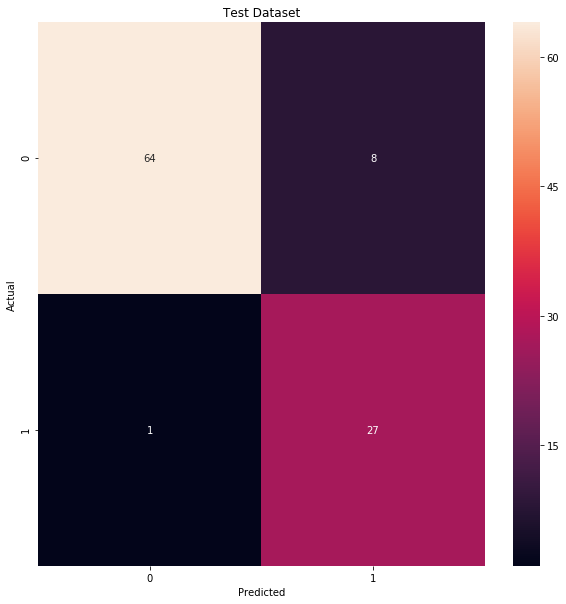

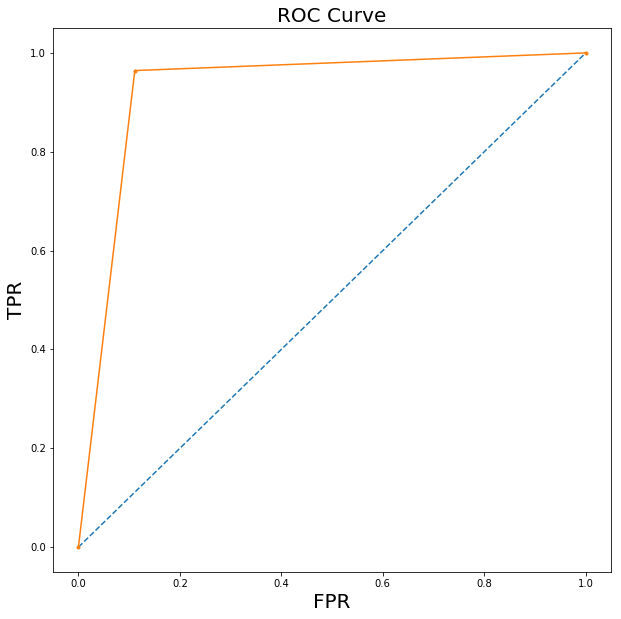

In [39]:
#Precision
print("Precision Score : ",precision_score(test_Y,pred_xgb))

#Recall
print("Recall Score : ",recall_score(test_Y,pred_xgb))

#Confusion Matrix
cm_xgb = confusion_matrix(test_Y,pred_xgb)

#Classification Report
print("Classification Report: ")
print(classification_report(test_Y,pred_xgb))
#Accuracy
print("Accuracy for Test: ",(cm_xgb[0,0] + cm_xgb[1,1])/
      (cm_xgb[0,0] + cm_xgb[1,1] + cm_xgb[0,1] + cm_xgb[1,0]))

plt.rcParams['figure.figsize'] = 10,10
sns.heatmap(cm_xgb,annot = True)
plt.title('Test Dataset')
plt.ylabel('Actual')
plt.xlabel('Predicted')

pred_xgb_train = model_xgb.predict(train_X)
cm = confusion_matrix(train_Y,pred_xgb_train > 0.5)
print("Accuracy for Train: ",(cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0]))

#ROC Curve
plt.figure()
plt.rcParams['figure.figsize'] = 7,7
fpr,tpr,threshold = roc_curve(test_Y,pred_xgb)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve',fontsize = 20)
plt.show()

This sums up all the model that i wanted to train. Now lets look at thei performance


In [40]:
index = ['LogisticRegression','SupportVectorClassifier(Linear)','SupportVectorClassifier(Gaussian)',
        'DecisionTree','RandomForest','PrincipalComponent','NaiveBayes','KNearestNeighbors',
        'AritficialNeuralNetwork','XGBoost']

data = [[precision_score(test_Y,pred_logistic),recall_score(test_Y,pred_logistic),
         (cm_logistic[0,0] + cm_logistic[1,1])/(cm_logistic[0,0]+cm_logistic[0,1]+cm_logistic[1,0]+cm_logistic[1,1])],
        [precision_score(test_Y,pred_svc_linear),recall_score(test_Y,pred_svc_linear),
         (cm_svc_linear[0,0] + cm_svc_linear[1,1])/(cm_svc_linear[0,0]+cm_svc_linear[0,1]+cm_svc_linear[1,0]+cm_svc_linear[1,1])],
        [precision_score(test_Y,pred_svc_rbf),recall_score(test_Y,pred_svc_rbf),
         (cm_svc_rbf[0,0] + cm_svc_rbf[1,1])/(cm_svc_rbf[0,0]+cm_svc_rbf[0,1]+cm_svc_rbf[1,0]+cm_svc_rbf[1,1])],
        [precision_score(test_Y,pred_dtree),recall_score(test_Y,pred_dtree),
         (cm_dtree[0,0] + cm_dtree[1,1])/(cm_dtree[0,0]+cm_dtree[0,1]+cm_dtree[1,0]+cm_dtree[1,1])],
        [precision_score(test_Y,pred_rforest),recall_score(test_Y,pred_rforest),
         (cm_rforest[0,0] + cm_rforest[1,1])/(cm_rforest[0,0]+cm_rforest[0,1]+cm_rforest[1,0]+cm_rforest[1,1])],
        [precision_score(test_Y,pred_pca),recall_score(test_Y,pred_pca),
         (cm_pca[0,0] + cm_pca[1,1])/(cm_pca[0,0]+cm_pca[0,1]+cm_pca[1,0]+cm_pca[1,1])],
        [precision_score(test_Y,pred_nb),recall_score(test_Y,pred_nb),
         (cm_nb[0,0] + cm_nb[1,1])/(cm_nb[0,0]+cm_nb[0,1]+cm_nb[1,0]+cm_nb[1,1])],
        [precision_score(test_Y,pred_knn),recall_score(test_Y,pred_knn),
         (cm_knn[0,0] + cm_knn[1,1])/(cm_knn[0,0]+cm_knn[0,1]+cm_knn[1,0]+cm_knn[1,1])],
        [precision_score(test_Y,pred_ann),recall_score(test_Y,pred_ann),
         (cm_ann[0,0] + cm_ann[1,1])/(cm_ann[0,0]+cm_ann[0,1]+cm_ann[1,0]+cm_ann[1,1])],
        [precision_score(test_Y,pred_xgb),recall_score(test_Y,pred_xgb),
         (cm_xgb[0,0] + cm_xgb[1,1])/(cm_xgb[0,0]+cm_xgb[0,1]+cm_xgb[1,0]+cm_xgb[1,1])]]

accuracy = pd.DataFrame(data = data,index = index,columns = ['Precision','Recall','Accuracy'])
accuracy.sort_values(by = ['Accuracy','Precision','Recall'],ascending = False)

,Precision,Recall,Accuracy
SupportVectorClassifier(Gaussian),0.843750,0.964286,0.94
DecisionTree,0.818182,0.964286,0.93
SupportVectorClassifier(Linear),0.833333,0.892857,0.92
LogisticRegression,0.827586,0.857143,0.91
RandomForest,0.787879,0.928571,0.91
XGBoost,0.771429,0.964286,0.91
AritficialNeuralNetwork,0.875000,0.750000,0.90
NaiveBayes,0.742857,0.928571,0.89
KNearestNeighbors,0.742857,0.928571,0.89
PrincipalComponent,0.694444,0.892857,0.86
